# Get and explore dataset

In [1]:
#import packages
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pandas as pd
import re

import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, BatchNormalization
#from keras.utils import to_categorical

In [3]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [4]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [5]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [6]:
#load positive and negative reviews
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [7]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

mean review = 4.336865588399331
standard deviation = 0    2.170281
dtype: float64


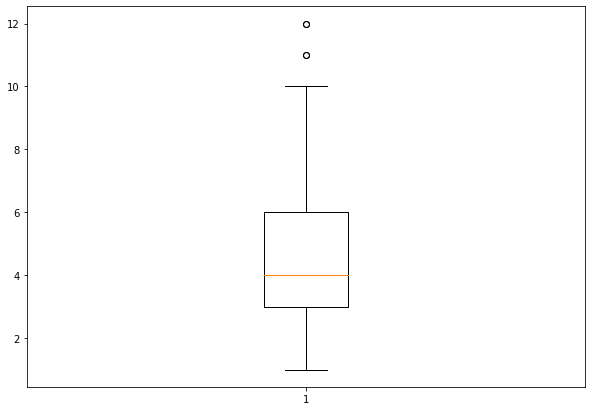

Number of unique words 2559


In [8]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.
count = []
sum_review =0 
for i in range(len(data)):
    #get the total number of words in a string and add the number to count
    count.append(len(str(data[i:i+1]).split()))

for j in range(len(count)):
    sum_review += count[j] 
print('mean review =',sum_review/len(count))   
count_df = pd.DataFrame(count)
std = count_df.std()
print('standard deviation =',std)
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(count_df)
 
# show plot
plt.show()

# - Calculate the number of unique words in the dataset
word_list = []
for i in range(len(data)):
    word_list.append(str(data[i])) 
word_list = str(word_list).split()
a = filter_words(str(word_list))
word_array = np.array(a.split())
print('Number of unique words',len(np.unique(word_array,return_counts =True)[0]))

# - Perform any other dataset investigation that you feel would be valuable

In [9]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Pre-processing

In [10]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length
pre_process_data = keras.preprocessing.sequence.pad_sequences(tokenized_data,
                                                              maxlen=4,
                                                              dtype="int32",
                                                              padding="pre",
                                                              truncating="pre",
                                                              value=0)
pre_process_data

array([[18,  4,  2, 19],
       [ 0,  2,  4,  2],
       [ 0,  0,  0,  0],
       ...,
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  6],
       [ 0,  0,  0,  0]])

In [11]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.
import random
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(pre_process_data,
                                                 labels, 
                                                 train_size=round(len(pre_process_data)*0.8),
                                                 test_size=round(len(pre_process_data)*0.2),
                                                 shuffle = True)

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(model, X_test, y_test):      
    #To do
    y_test = to_class(y_test)
    y_pred = model.predict(X_test)
    y_pred = to_class(y_pred)
    print(classification_report(y_test,y_pred))

    classes = (1,0)
    conf_mat = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)
    print(cm_df)

# Build and tune model

Define network architecture

In [13]:
#create model
model = Sequential()
#model.add(keras.layers.Flatten())
model.add(Embedding(2559, 100, input_length = len(x_train[1])))
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(LSTM(32,activation='relu', return_sequences = False))
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer='adam',#tf.train.AdamOptimizer()
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

In [15]:
#inspect number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 25)             63975     
                                                                 
 spatial_dropout1d (SpatialD  (None, 4, 25)            0         
 ropout1D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 4, 25)            100       
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 32)                7424      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 71,565
Trainable params: 71,515
Non-traina

Train model

In [14]:
#fit data to model
batch_size = 10
num_epochs = 5
history = model.fit(x = x_train ,
          y = y_train,
          batch_size=batch_size, 
          epochs=num_epochs,
          validation_data = (x_test, y_test))
#[y_train[:, 0], y_train[:, 1]]

Epoch 1/5
144/144 [==============================] - 6s 17ms/step - loss: 0.6765 - accuracy: 0.5711 - val_loss: 0.6888 - val_accuracy: 0.5850
Epoch 2/5
144/144 [==============================] - 2s 14ms/step - loss: 0.6450 - accuracy: 0.6060 - val_loss: 0.6829 - val_accuracy: 0.5766
Epoch 3/5
144/144 [==============================] - 2s 12ms/step - loss: 0.6393 - accuracy: 0.6213 - val_loss: 0.6716 - val_accuracy: 0.5989
Epoch 4/5
144/144 [==============================] - 2s 13ms/step - loss: 0.6272 - accuracy: 0.6311 - val_loss: 0.6551 - val_accuracy: 0.6017
Epoch 5/5
144/144 [==============================] - 2s 14ms/step - loss: 0.6209 - accuracy: 0.6262 - val_loss: 0.6644 - val_accuracy: 0.6100


Examine performance of model

In [26]:
#output_dim at 10
assess_model(model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.63      0.44      0.52       176
           1       0.58      0.75      0.66       183

    accuracy                           0.60       359
   macro avg       0.61      0.60      0.59       359
weighted avg       0.61      0.60      0.59       359

    1    0
1  78   98
0  46  137


In [29]:
#output_dim at 25
assess_model(model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.63      0.45      0.52       176
           1       0.58      0.74      0.65       183

    accuracy                           0.60       359
   macro avg       0.61      0.60      0.59       359
weighted avg       0.60      0.60      0.59       359

    1    0
1  79   97
0  47  136


In [32]:
#output_dim at 50
assess_model(model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.64      0.48      0.55       176
           1       0.59      0.74      0.66       183

    accuracy                           0.61       359
   macro avg       0.62      0.61      0.60       359
weighted avg       0.62      0.61      0.60       359

    1    0
1  84   92
0  48  135


In [35]:
#output_dim at 100
assess_model(model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.64      0.53      0.58       176
           1       0.61      0.72      0.66       183

    accuracy                           0.62       359
   macro avg       0.63      0.62      0.62       359
weighted avg       0.63      0.62      0.62       359

    1    0
1  93   83
0  52  131


Plot graphs for accuracy and loss

In [21]:
def plot_acc_loss(history, epochs):
    #plot accuracy
    epoch_range = range(1,epochs +1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()
    
    #plot loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()
#code for plotting function from https://www.youtube.com/watch?v=UxiDUrOhnf4

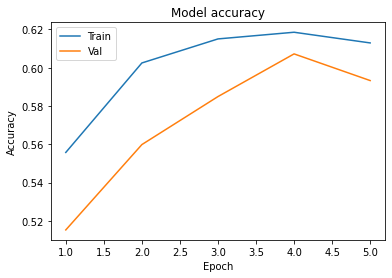

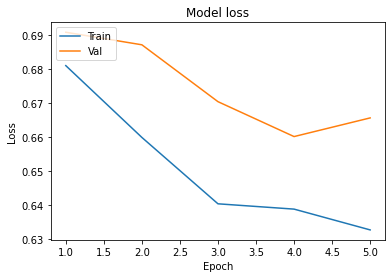

In [22]:
#plot accuracy and loss for train and test data set 
plot_acc_loss(history, num_epochs)

# Make a prediction

In [23]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = keras.preprocessing.sequence.pad_sequences(tokenized, padding='post', maxlen=4)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.
testPredict = model.predict(padded)
y = to_word_label(testPredict)
y

['negative', 'negative', 'positive', 'negative', 'negative']